# IMA207 - Practical work on SAR statistics

### Emanuele DALSASSO, Florence TUPIN

### Statistics and despeckling

The practical work is divided in 3 parts 

- A. empirical checking of the distributions seen in course for single look complex images 
- B.  computation of equivalent number of looks using images of physically homogeneous areas
- C. spatial multi-looking and implementation of the Lee filter

You have at your disposal a set of images coming from different sensors and with different characteristics on the same area of Flevoland in Netherlands (for each sensor and acquisition mode, an homogeneous area of sea has been selected with *mer* extension, and an area of farmland with  *centre* extension):
- Sentinel-1 sensor (ESA), SLC (Single look Complex) data and GRD (Ground Range Detected) data ;
- ERS sensor (ESA), PRI product (ground range data);
- Alos sensor (JAXA), SLC (Single look Complex) data.

Some useful functions are available in the file *mvalab.py*.

### Name: MALECOT Jeanne

#### Instructions

To solve this practical session, answer the questions below. Then export the notebook with the answers using the menu option **File -> Download as -> Notebook (.ipynb)**. Then [submit the resulting file on e-campus by next week. 

### Import the libraries and packages we are going to use
The following cell imports all that is going to be necessary for the practical work

In [14]:
# working on vscode
#!wget https://perso.telecom-paristech.fr/tupin/TPSAR/mvalab.py

In [15]:
import scipy
from scipy import signal
import scipy.signal
import scipy as spy
import scipy.fftpack
from scipy import ndimage
from scipy import special
from scipy import ndimage
import numpy as np
import math
import matplotlib.pyplot as plt
import mvalab as mvalab
from urllib.request import urlopen
import cmath

plt.rcParams['figure.figsize'] = [15, 15]
plt.rcParams['figure.max_open_warning'] = 30

## A. Single look data distributions 
In this part, we will use an SLC (Single Look Complex) image and analyze its pdf. 
The image has been acquired by the Sentinel-1 sensor over the Lelystad zone (very flat area with fields crops). 
Vizualize the amplitude image and interpret it. You may want to have a look to an [optical image](https://goo.gl/maps/JJcYcRjMKj1p6uqW8) of the area

N.B.: An amplitude image is given by the modulus of the electro-magnetic field and intensity is the square of the amplitude (proportional to the signal power). 

imz2mat : version janvier 2018.  Fichier à ouvrir : https://perso.telecom-paristech.fr/tupin/TPSAR/pilelely/Lely.CXF
Nom compatible url
Nom compatible url
Complex float, Fichiers PC
INFO - reading header/dim : https://perso.telecom-paristech.fr/tupin/TPSAR/pilelely/Lely.dim
lecture .dim OK -> largeur:3072 hauteur:1024 profondeur:1
Debug 2 4 3072
4 3072 <f
Affichage d'une image complexe : on prend le module
plt.show dans visusar : image 2000 x 1000


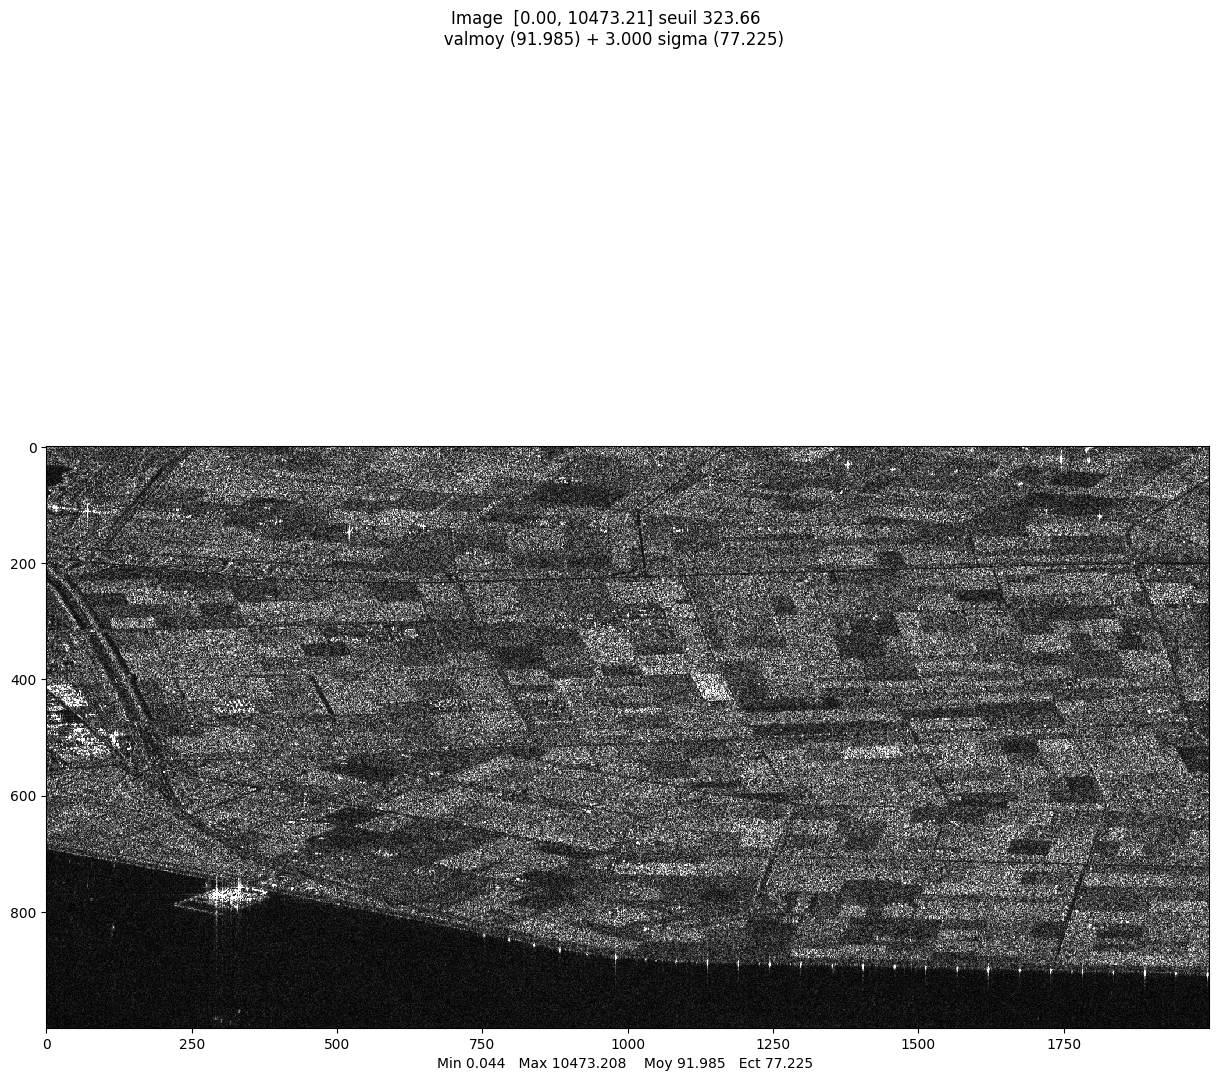

array([[189.39645707, 120.37768382,  88.18239552, ...,  15.83329392,
         81.56227421,  49.77878747],
       [ 82.14861489, 182.63059347, 129.35037906, ...,  27.13825688,
        125.72671142, 110.59154859],
       [ 70.72612706,  95.41594535, 172.73440866, ...,  94.75140509,
        135.06825916, 110.69568918],
       ...,
       [ 28.69899713,  17.15711468,  41.06853971, ...,  29.98631779,
         33.79961213,  25.71624981],
       [ 13.0488964 ,  25.83298061,  43.69642329, ...,  17.40038001,
          9.72895615,  27.4559638 ],
       [ 24.08634607,  19.56106813,   4.41799745, ...,  31.60940237,
         41.32337103,  19.87143731]])

In [16]:
pageweb="https://perso.telecom-paristech.fr/tupin/TPSAR/pilelely/"
image='Lely.CXF'
im_slc_senti_lely_liste=mvalab.imz2mat(pageweb+image);
im_slc_senti_lely = im_slc_senti_lely_liste[0]
ncol=im_slc_senti_lely_liste[1]
nlig=im_slc_senti_lely_liste[2]

mvalab.visusar(im_slc_senti_lely[0:1000,0:2000])


#### Data distributions for an homogeneous area
Select a physically homogeneous area (you can zoom and see coordinates as you move the arrow on the image) and compute the distribution of the real part, imaginary part, phase, intensity and amplitude. Some useful functions are:
- `np.angle`
- `np.real`
- `np.imag` 

Then, estimate the coefficient of variation:  
$\gamma=\frac{\sigma}{\mu}$ using intensity data (square of the modulus of the complex field)



Affichage d'une image complexe : on prend le module
plt.show dans visusar : image 150 x 150


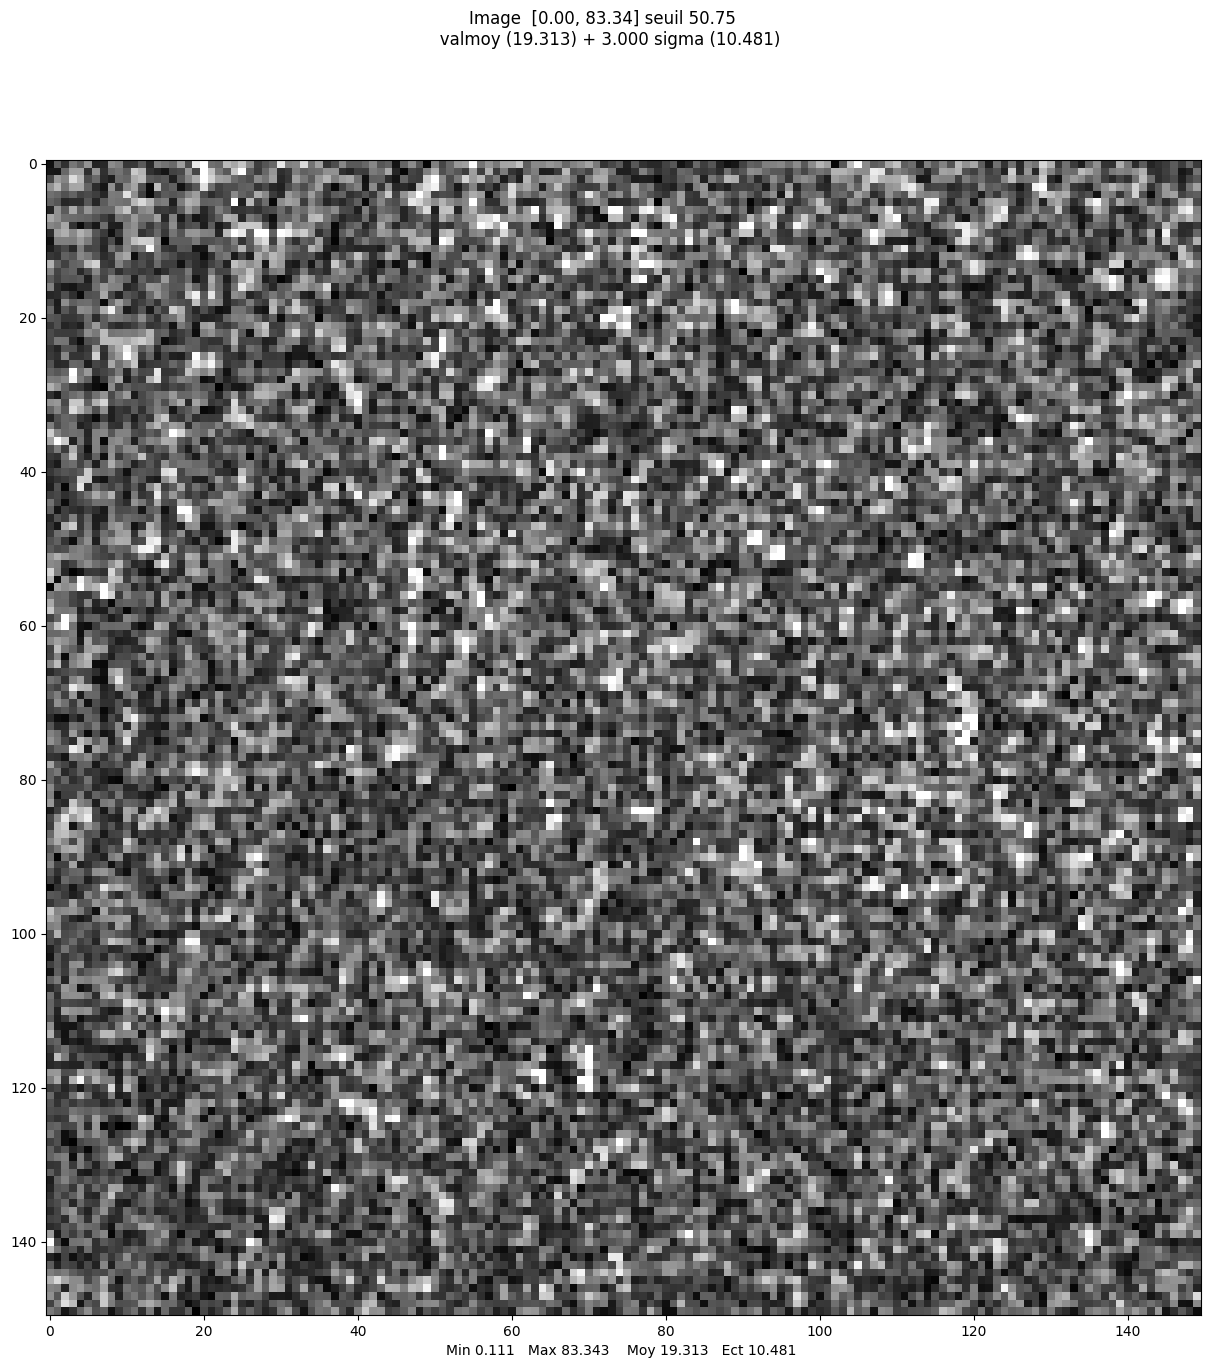

In [17]:
# Select a crop of the image (around 150 by 150 pixels)
# which is physically homogeneous 
crop_slc = im_slc_senti_lely[850:1000,0:150] #complete
mvalab.visusar(crop_slc)

# Compute amplitude, intensity, phase, real and imaginary part
amp_senti_lely = np.abs(crop_slc)
int_senti_lely = np.abs(crop_slc)**2
ph_senti_lely = np.angle(crop_slc) 
real_senti_lely = np.real(crop_slc) 
imag_senti_lely = np.imag(crop_slc)

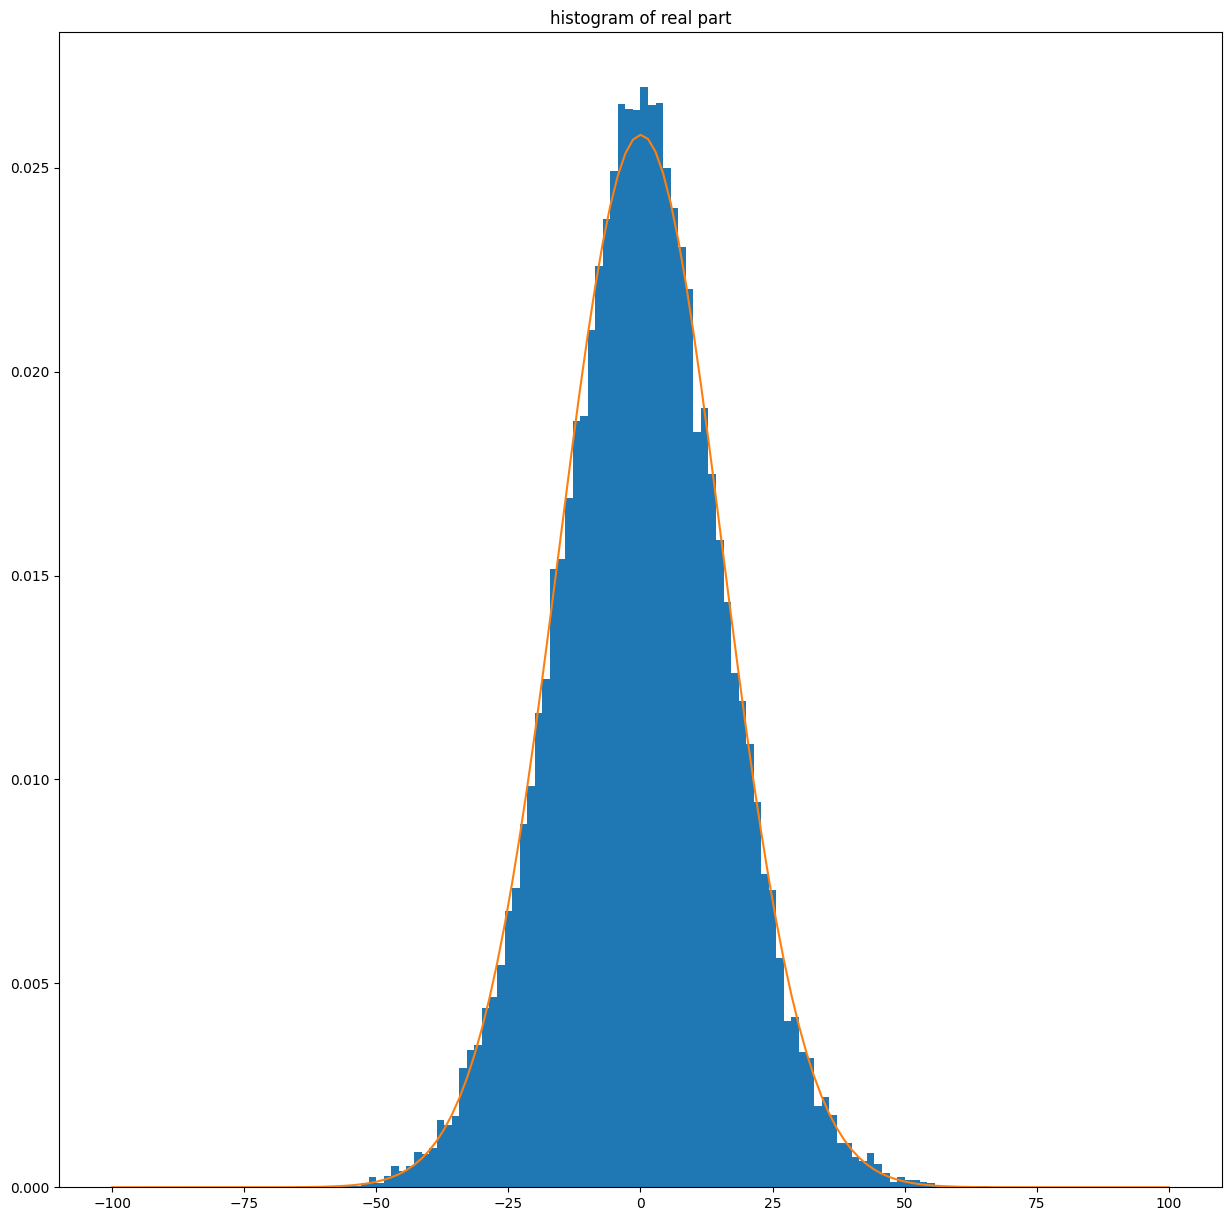

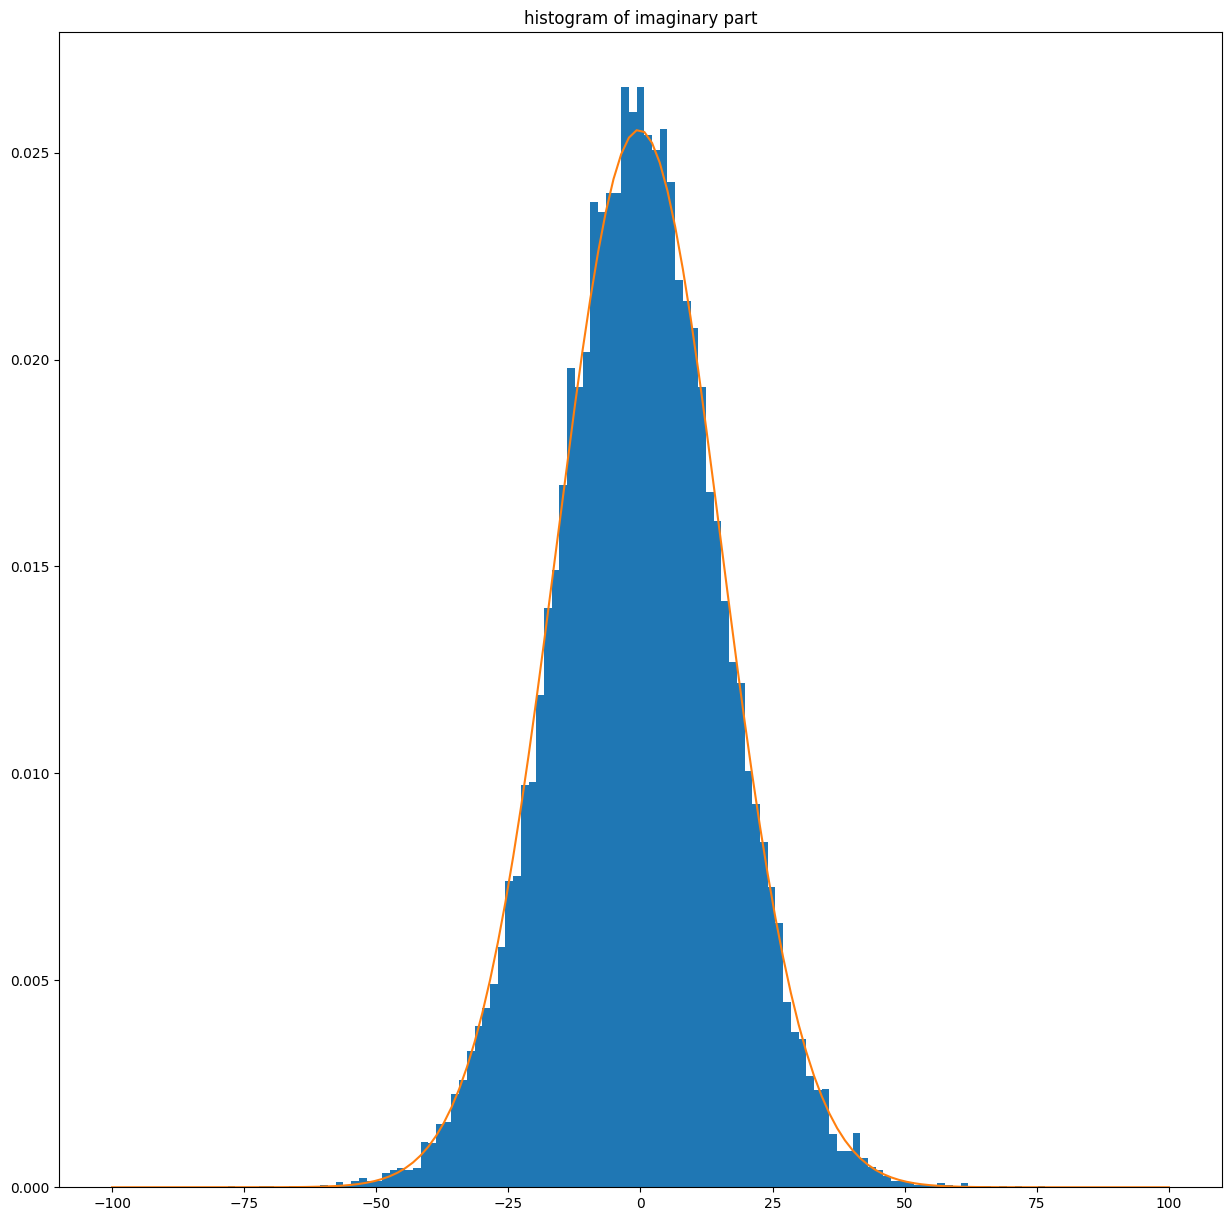

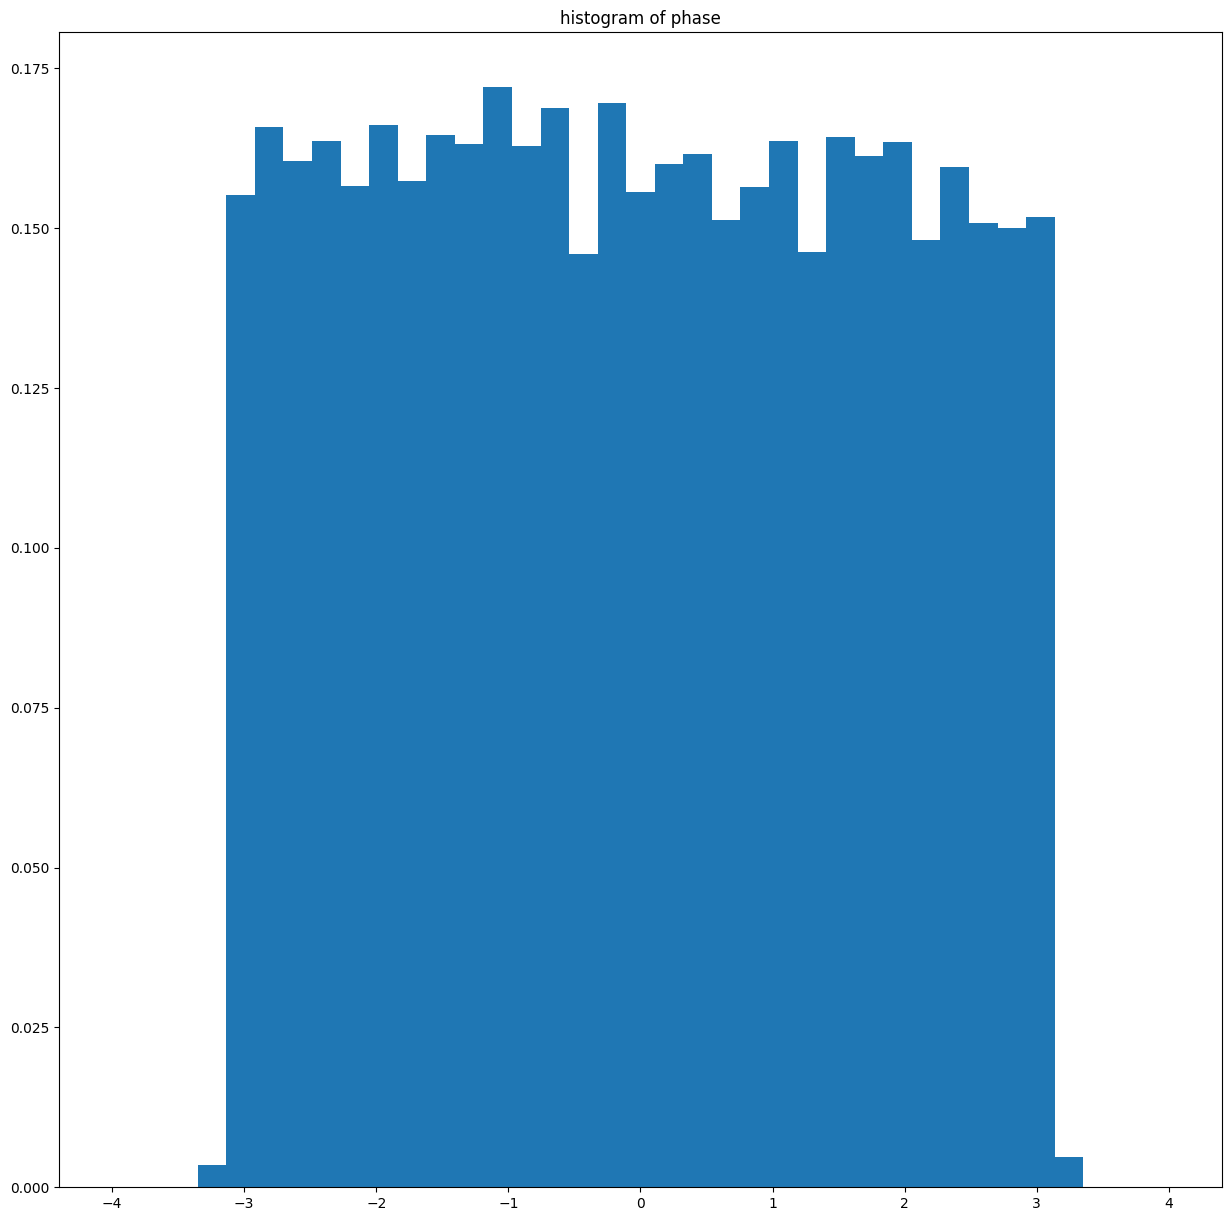

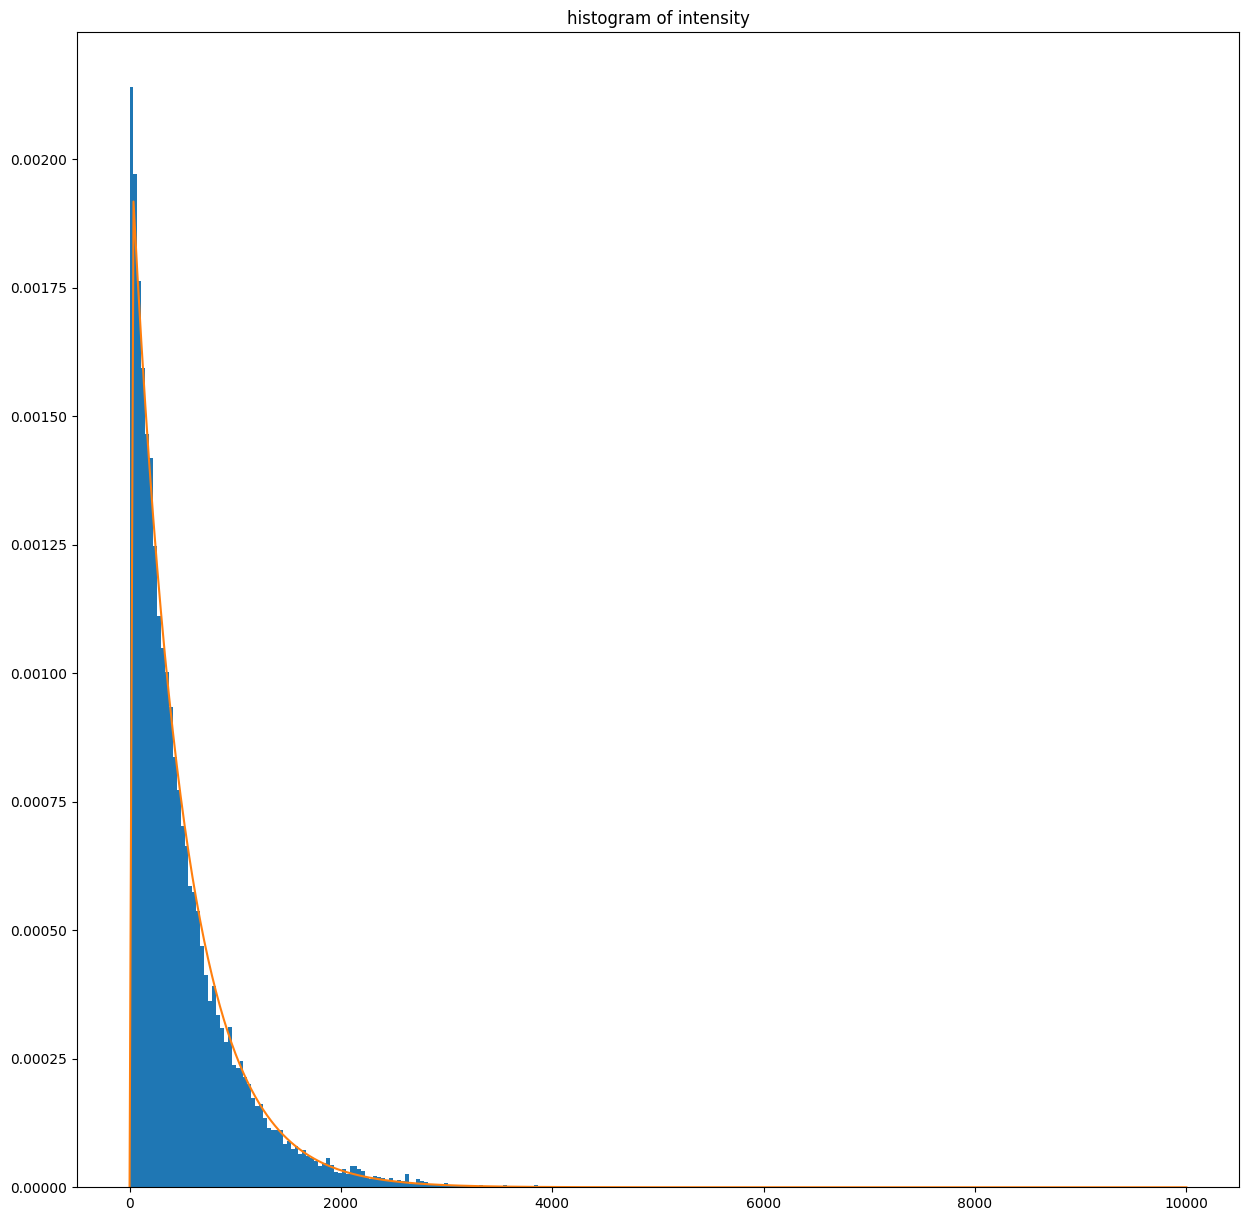

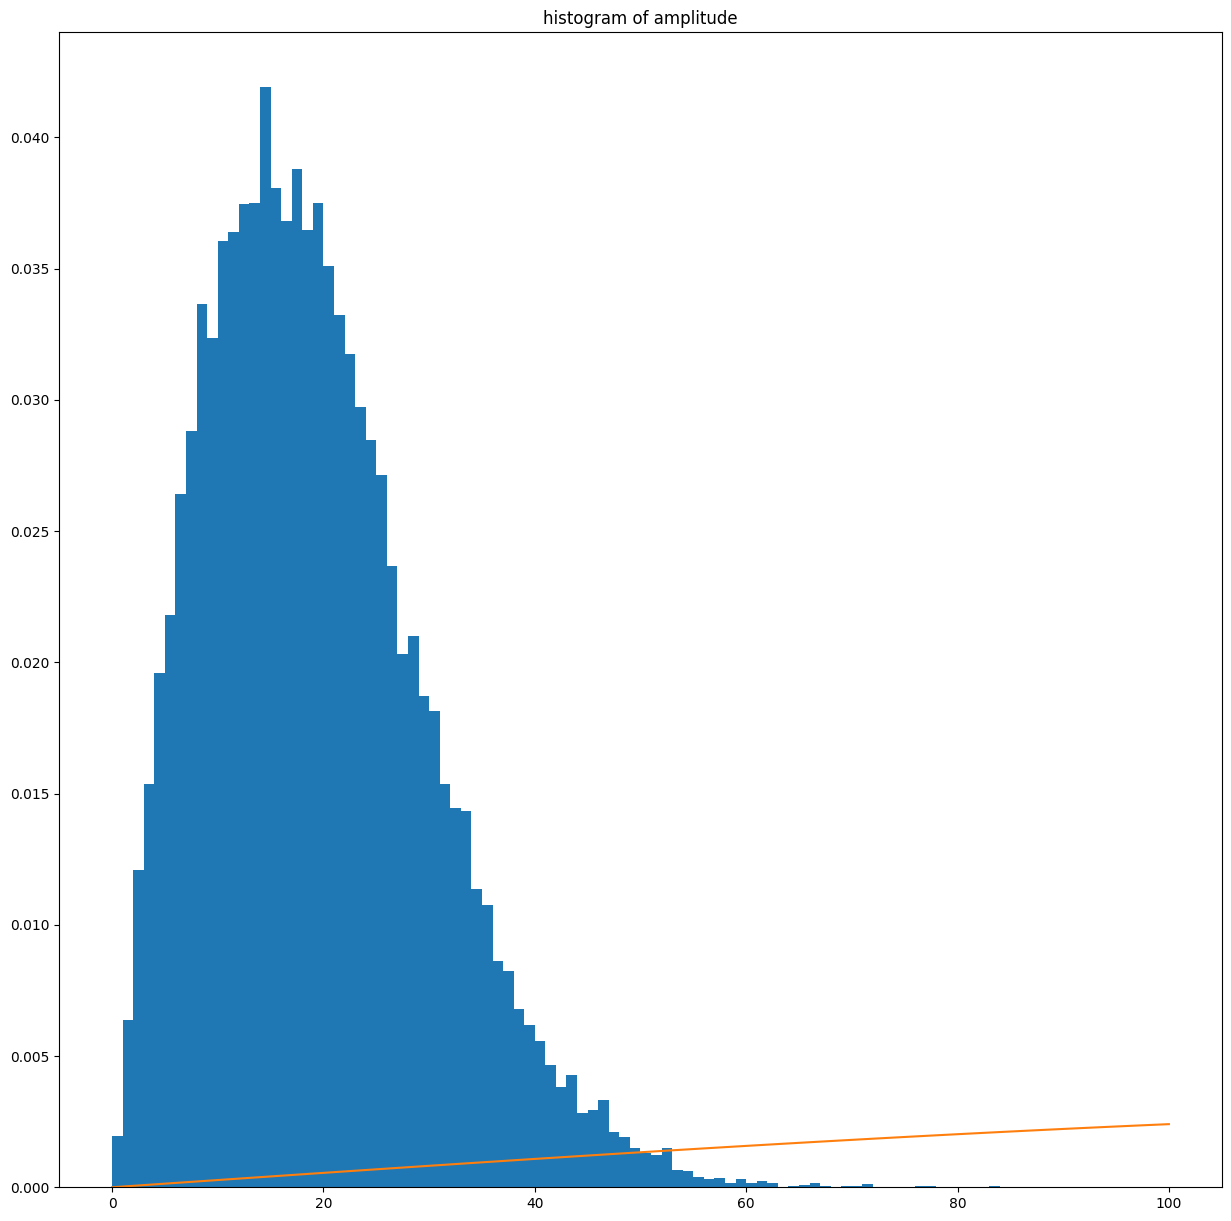

In [18]:
# Plot the histograms and verify they match the theoretical distribution
# Use the right range of values to plot the histogram 
# Choose the right distribution to do the fitting

# fitting of the distributions 
# use the following ones :
# Gaussian pdf : scipy.stats.norm
# Rayleigh pdf : scipy.stats.rayleigh
# Exponential pdf : scipy.stats.expon

#example for real part of the data 
plt.figure()
_, bins, _ = plt.hist(real_senti_lely.ravel(),bins='auto',density=True,range=[-100,100])  # Gaussian distribution
mu, sigma = scipy.stats.norm.fit(real_senti_lely)
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma) 
plt.plot(bins, best_fit_line)
plt.title('histogram of real part')
plt.show()

#complete for imaginary part: Gaussian distribution
plt.figure()
_, bins, _ = plt.hist(imag_senti_lely.ravel(),bins='auto',density=True,range=[-100,100])  # Gaussian distribution
mu, sigma = scipy.stats.norm.fit(imag_senti_lely)
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma) 
plt.plot(bins, best_fit_line)
plt.title('histogram of imaginary part')
plt.show()


#complete for phase data: Uniform distribution
plt.figure()
plt.hist(ph_senti_lely.ravel(),bins='auto',density=True,range=[-4,4]) #complete
plt.title('histogram of phase')
plt.show()


#complete for intensity data: Exponential (Gamma) distribution
plt.figure()
_, bins, _ = plt.hist(int_senti_lely.ravel(),bins='auto',density=True,range=[-0,10000]) 
mu, sigma = scipy.stats.expon.fit(int_senti_lely)
best_fit_line = scipy.stats.expon.pdf(bins, mu, sigma) 
plt.plot(bins, best_fit_line)
plt.title('histogram of intensity')
plt.show()

#complete for amplitude data: Rayleigh distribution
plt.figure()
_, bins, _ = plt.hist(amp_senti_lely.ravel(),bins='auto',density=True,range=[0,100])  # Gaussian distribution
mu, sigma = scipy.stats.rayleigh.fit(amp_senti_lely)
best_fit_line = scipy.stats.rayleigh.pdf(bins, mu, sigma) 
plt.plot(bins, best_fit_line)
plt.title('histogram of amplitude')
plt.show()

In [19]:
# Compute the coefficient of variation on the homogeneous crop in intensity

m_I = np.mean(int_senti_lely) #complete
sigma_I = np.std(int_senti_lely) #complete
coeff_var_I = sigma_I/m_I
print(coeff_var_I)

1.061429081623993


### Question A.1. 
Did you find the distributions seen in the course ? (recapitulate them).
Did you find the correct value for the coefficient of variation ? How would this coefficient be modified if the selected area is physically heterogeneous ? Could this coefficient be less than the theoretical value ?


### Answer A.1.

Les parties réelles et imaginaires suivent toutes les deux des distributions normales, l'intensité une loi exponentielle et donc l'amplitude une loi de Rayleigh.  
Le coefficient est proche de 1, ce qui était attendu avec une zone assez homogène, tandis qu'il aurait été plus élevé avec une zone hétérogène (à cause d'une variance plus grande).  
Un coefficient inférieur à 1 signifierait que l'on observe directement le bruit thermique du capteur.

## B. Computation of the Equivalent Number of looks on homogeneous areas
In this part you have at your disposal 2 images of a part of the sea. One is a Sentinel-1 GRD image and the other one is an ERS image. The multi-looking has been done by the data provider (ESA, European Space Agency).
Use the value of the coefficient of variation to find the Equivalent Number of Looks (ENL) of the Sentinel-1 GRD and ERS data. 
The formula is :
- $\gamma_I=\frac{1}{\sqrt{L}}$ for intensity data 


imz2mat : version janvier 2018.  Fichier à ouvrir : https://perso.telecom-paristech.fr/tupin/TPSAR/DATA/images/SentinelGRD_flevoland_mer.imw
Nom compatible url
Nom compatible url
Unsigned short, Fichiers Unix
INFO - reading header/dim : https://perso.telecom-paristech.fr/tupin/TPSAR/DATA/images/SentinelGRD_flevoland_mer.dim
lecture .dim OK -> largeur:512 hauteur:512 profondeur:1
Debug 1 2 512
2 512 >H
Affichage d'une image reelle
plt.show dans visusar : image 512 x 512


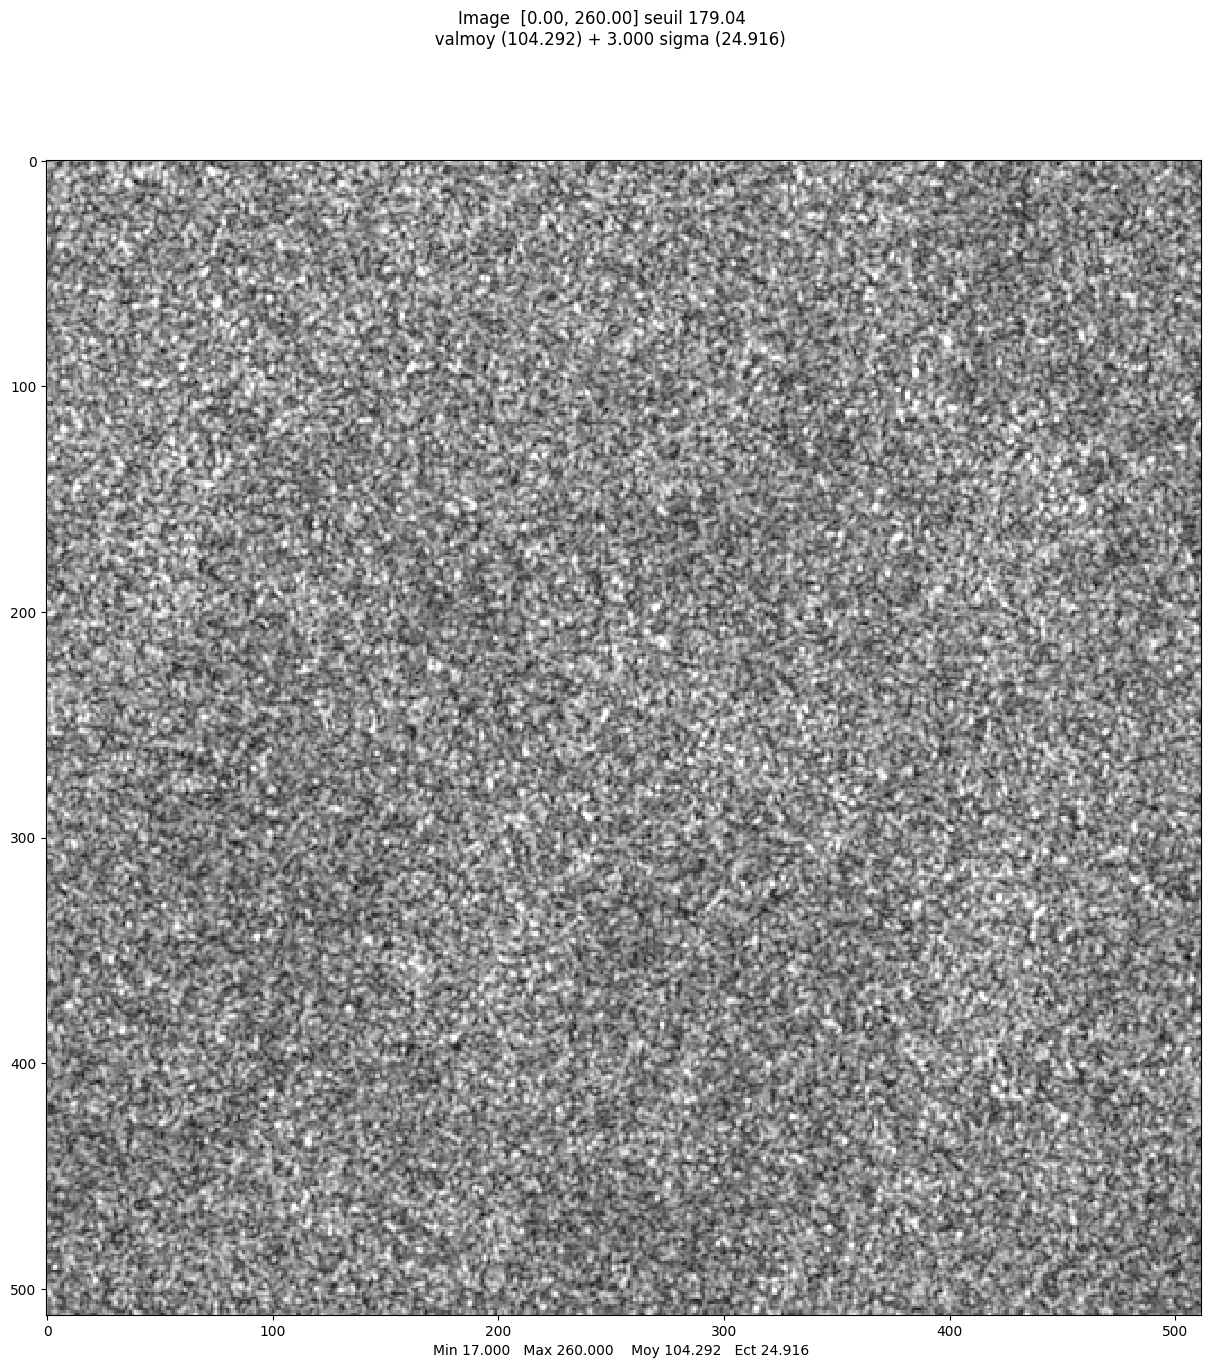

--- coeff var and L ---
0.4761187021566277
4.411329699276713


In [20]:
pageweb='https://perso.telecom-paristech.fr/tupin/TPSAR/DATA/images/'
image = 'SentinelGRD_flevoland_mer.imw'
im_sentigrd_mer = mvalab.imz2mat(pageweb+image)
mvalab.visusar(np.abs(im_sentigrd_mer[0]))

# compute coefficient of variation and number of looks
coeff_var_grd = np.std(np.abs(im_sentigrd_mer[0])**2)/np.mean(np.abs(im_sentigrd_mer[0])**2)
L_grd = 1/(coeff_var_grd**2)
print('--- coeff var and L ---')
print(coeff_var_grd)
print(L_grd)

imz2mat : version janvier 2018.  Fichier à ouvrir : https://perso.telecom-paristech.fr/tupin/TPSAR/DATA/images/ERS_flevoland_mer.imw
Nom compatible url
Nom compatible url
Unsigned short, Fichiers Unix
INFO - reading header/dim : https://perso.telecom-paristech.fr/tupin/TPSAR/DATA/images/ERS_flevoland_mer.dim
lecture .dim OK -> largeur:512 hauteur:512 profondeur:1
Debug 1 2 512
2 512 >H
Affichage d'une image reelle
plt.show dans visusar : image 512 x 512


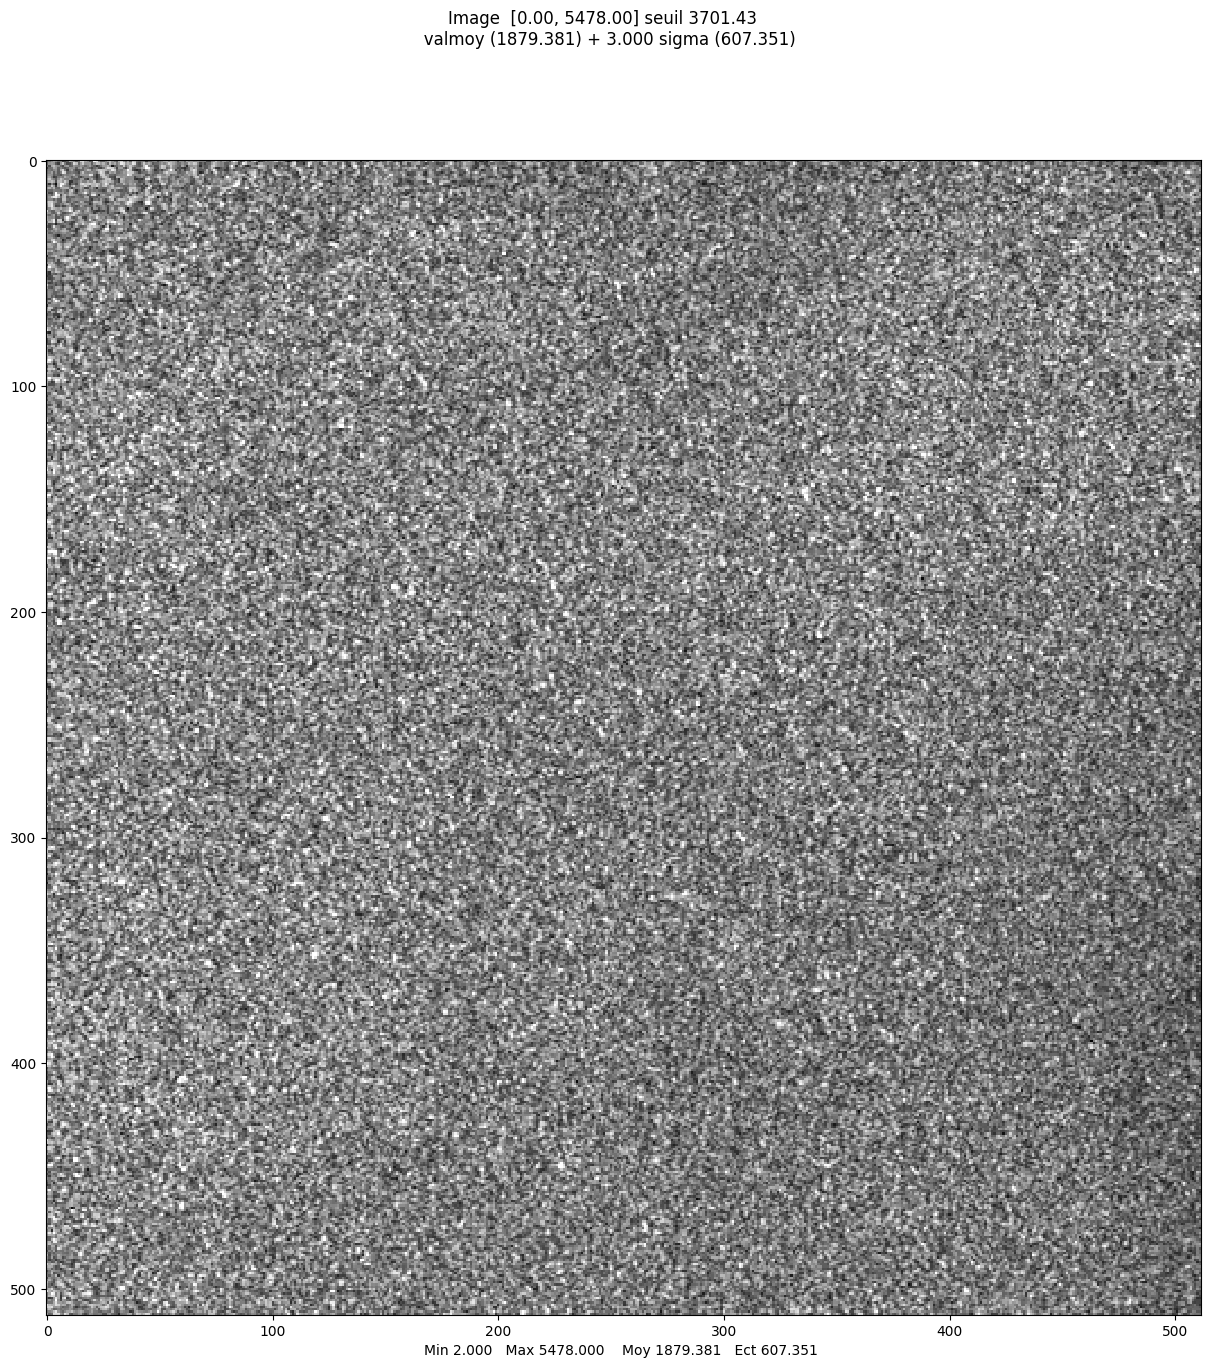

--- coeff var and L ---
0.6426853019887805
2.421047244105231


In [21]:
image = 'ERS_flevoland_mer.imw'
im_ers_mer = mvalab.imz2mat(pageweb+image)
mvalab.visusar(np.abs(im_ers_mer[0]))

# compute coefficient of variation and number of looks
coeff_var_grd = np.std(np.abs(im_ers_mer[0])**2)/np.mean(np.abs(im_ers_mer[0])**2)
L_grd = 1/(coeff_var_grd**2)
print('--- coeff var and L ---')
print(coeff_var_grd)
print(L_grd)

### Question B.1
Comment the number of looks you have found for GRD and ERS data (is it an integer value ? why not ? what does it mean ?).


### Answer B.1

On ne trouve pas de valeur entière, à cause de l'hypothèse de considérer les images comme iid.

## C. Spatial multi-looking and implementation of the Lee filter

In this part we will try simple speckle reduction method using the following step :
- first we will compute a mean filter 
- then we will compute the local coefficient of variation (using the same size for the moving window)
- finally we will combine these two results to obtain the Lee filter.

## C.1 Computation of the mean filter
Compute the mean filter using a 2D convolution. 

imz2mat : version janvier 2018.  Fichier à ouvrir : https://perso.telecom-paristech.fr/tupin/TPSAR/pilelely/multitemp/lely_tuple_multitemp.IMA
Nom compatible url
Nom compatible url
INFO - reading header/dim : https://perso.telecom-paristech.fr/tupin/TPSAR/pilelely/multitemp/lely_tuple_multitemp.dim
Multitemporal image 25 data
Fichiers PC
Image  complex float
lecture .dim OK -> largeur:512 hauteur:512 profondeur:25
Debug 2 4 512
4 512 <f
Affichage d'une image reelle
plt.show dans visusar : image 512 x 512


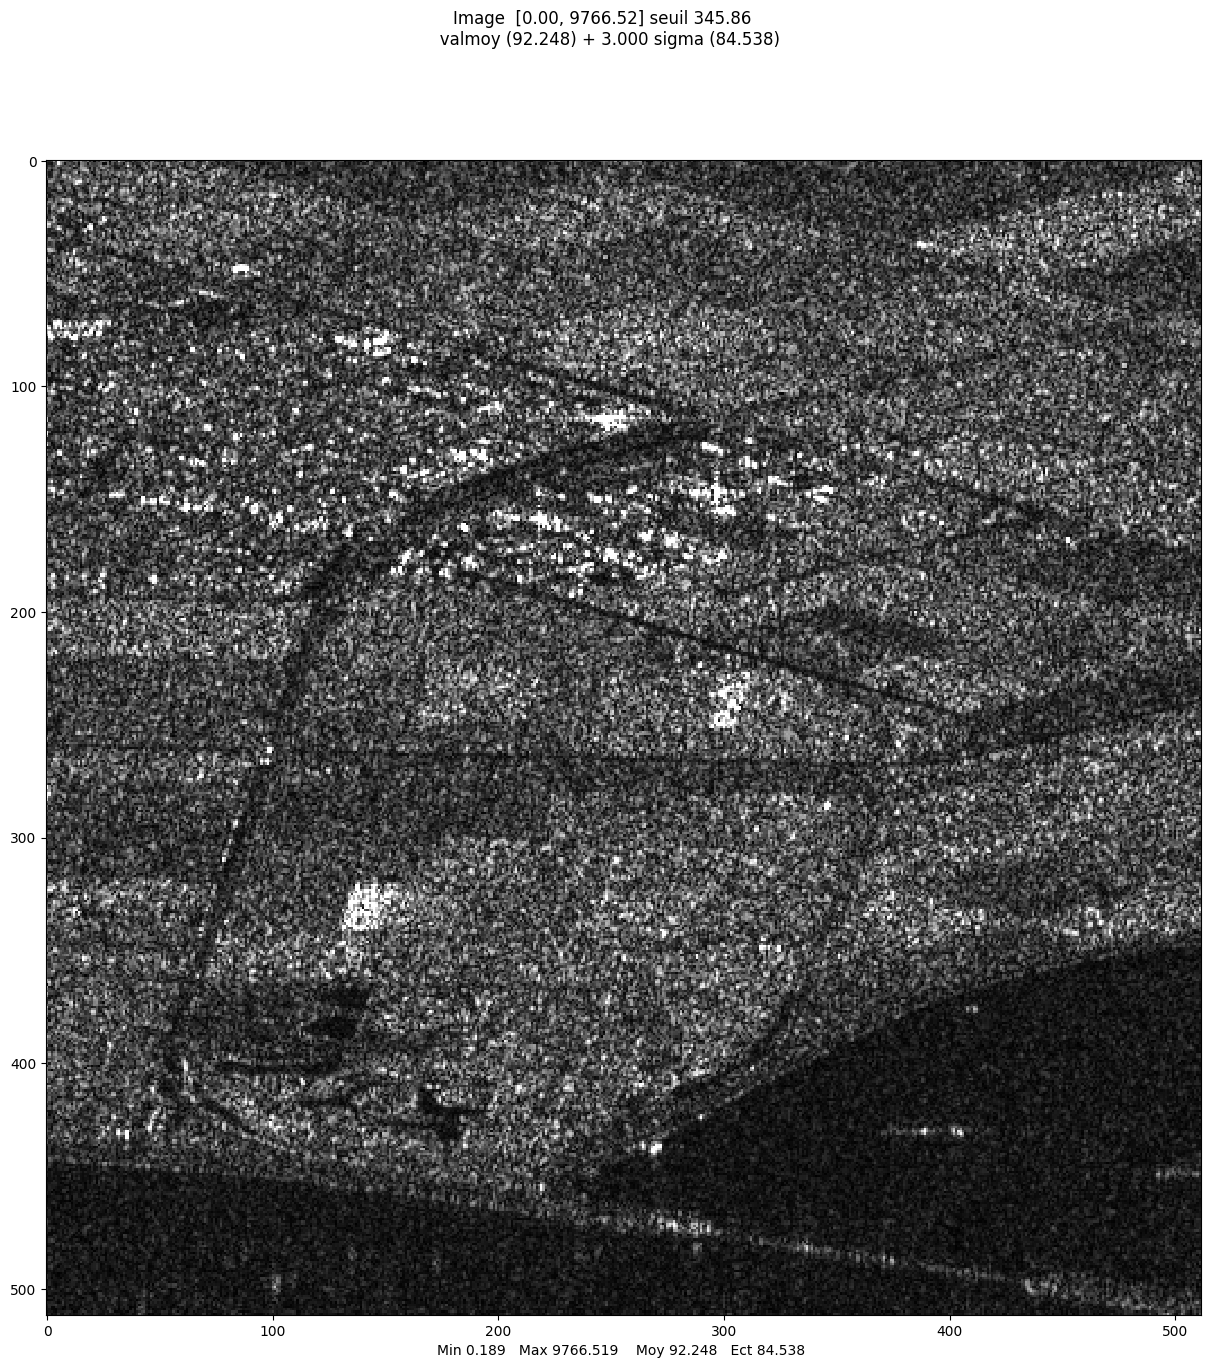

Affichage d'une image reelle
plt.show dans visusar : image 512 x 512


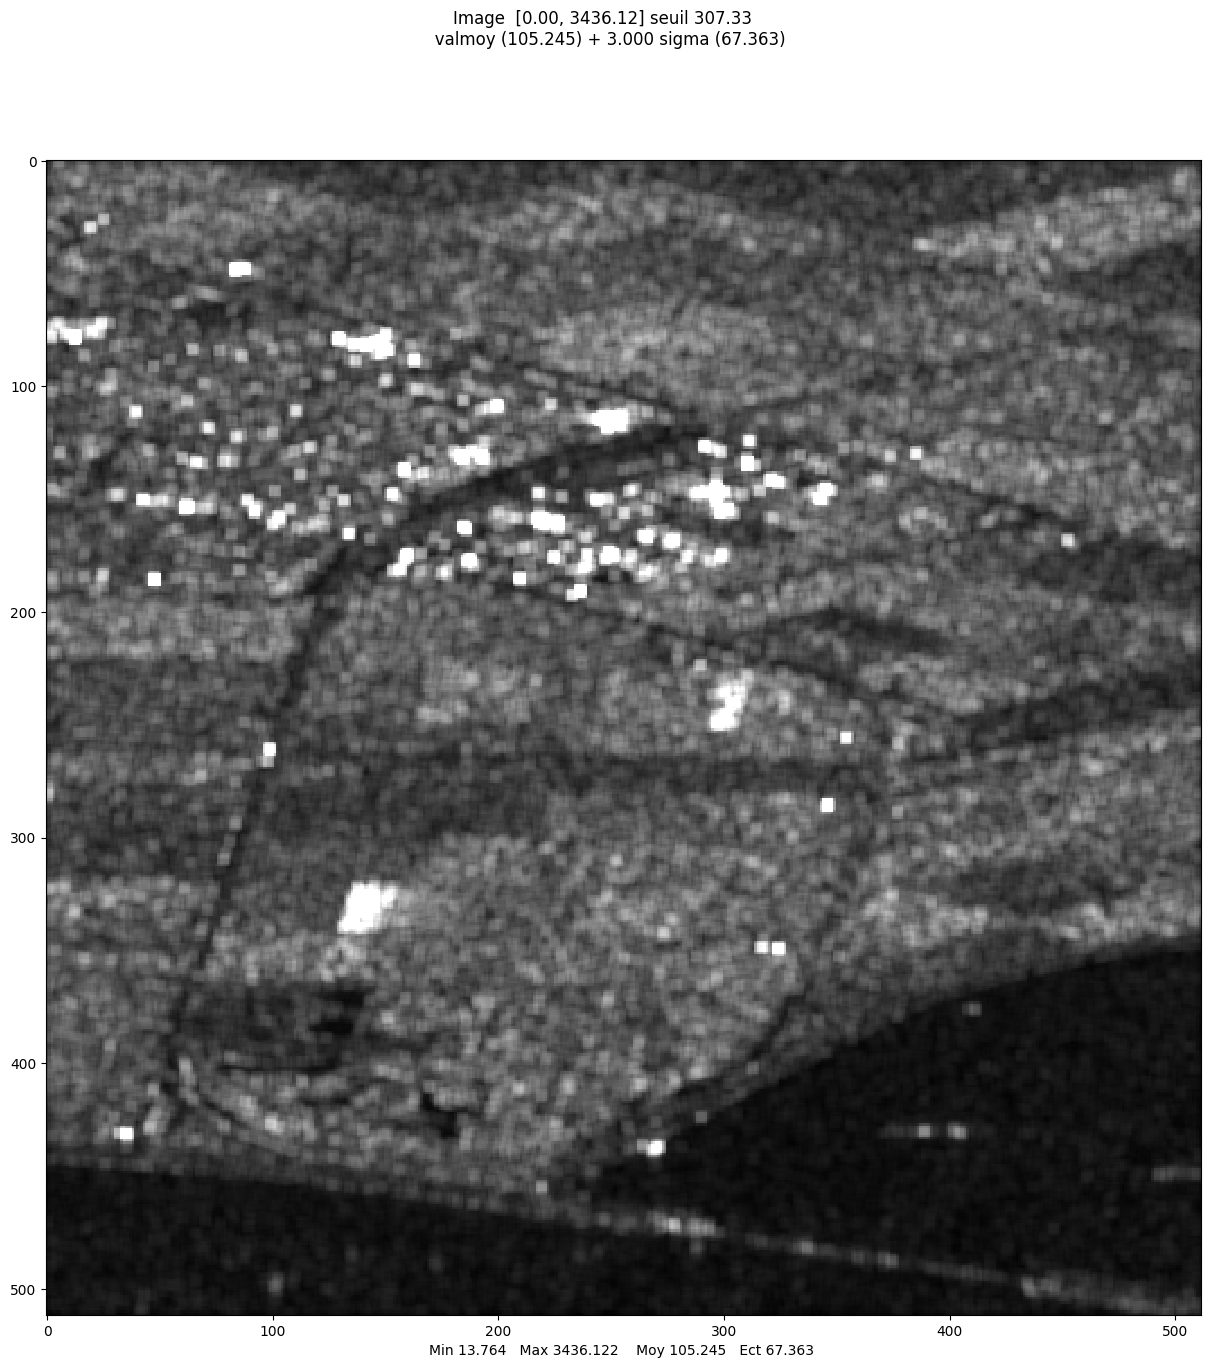

array([[ 36.16357849,  60.37846854,  75.09895251, ...,  65.97379182,
         64.93731862,  54.19673382],
       [ 49.75327344,  73.89279855,  91.88775241, ...,  74.74556406,
         71.40564778,  61.69807062],
       [ 58.95496876,  82.50476924, 101.52331965, ...,  90.31393586,
         76.67247654,  67.47428643],
       ...,
       [ 28.76068392,  32.31336262,  37.42377387, ...,  75.2869592 ,
         72.15065475,  59.96826805],
       [ 22.51759526,  23.86431155,  26.48703706, ...,  66.25305727,
         65.30461392,  56.0114648 ],
       [ 18.58510692,  20.07597809,  20.8611772 , ...,  51.83487054,
         51.28754571,  46.64245607]])

In [27]:
webpage='https://perso.telecom-paristech.fr/tupin/TPSAR/pilelely/multitemp/'
image='lely_tuple_multitemp.IMA'
im_lely_multitemp = mvalab.imz2mat(webpage+image)
lely_crop_slc = im_lely_multitemp[0][:,:,0]

# take the intensity 
ima_int = np.abs(lely_crop_slc)**2
mvalab.visusar(np.sqrt(ima_int));

# create the average window
size_window = 5
masque_loc = np.ones((size_window,size_window))/(size_window**2)

# compute the mean image (intensity data)
ima_int_mean = scipy.signal.convolve2d(ima_int,masque_loc,mode='same')

# diplay the result
mvalab.visusar(np.sqrt(ima_int_mean))


### Question C.1
What is the effect of the mean filter ? (advantages and drawbacks). What is the influence of the window size ? 

### Answer C.1

Le filtre moyenneur à pour effet d'atténuer le bruit, quitte à donner une impression de flou.  
Une fenêtre plus petite diminuera cette impression de flou, en échange d'une réduction de bruit plus légère.

### C. 2 Computation of the local standard deviation and the local coefficient of variation 

Using convolution operations as indicated in the following code compute the local standard deviation (and visualize it) and do the same for the local coefficient of variation. 

Affichage d'une image reelle
plt.show dans visusar : image 512 x 512


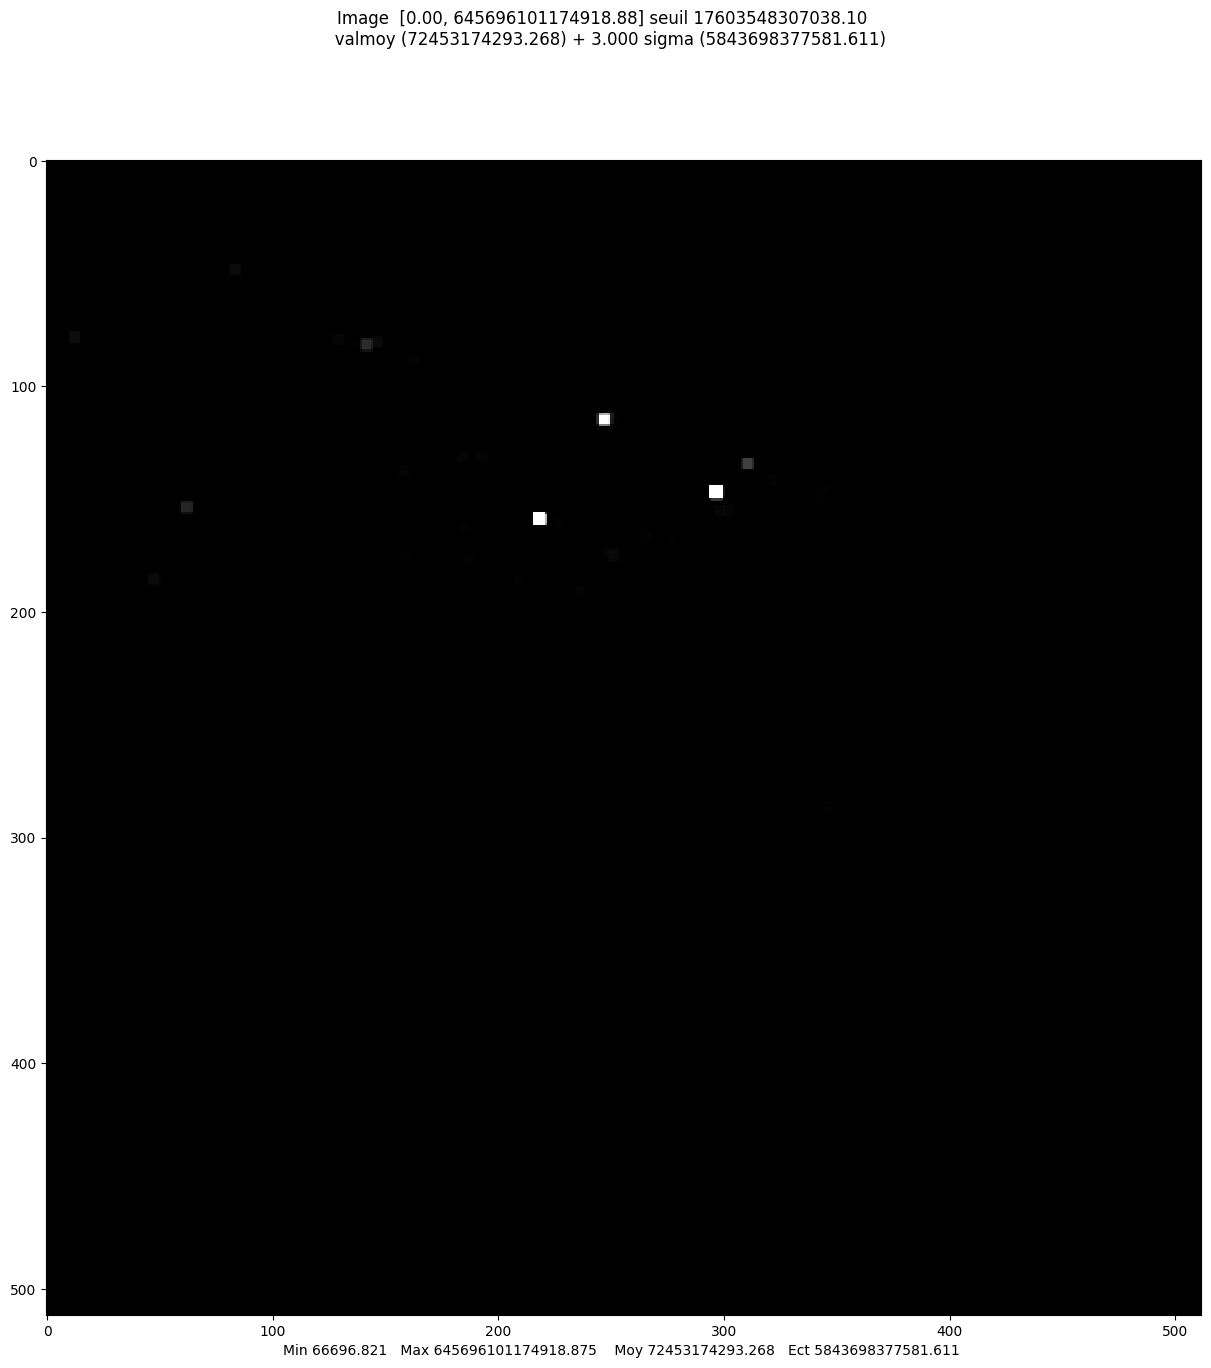

Affichage d'une image reelle
plt.show dans visusar : image 512 x 512


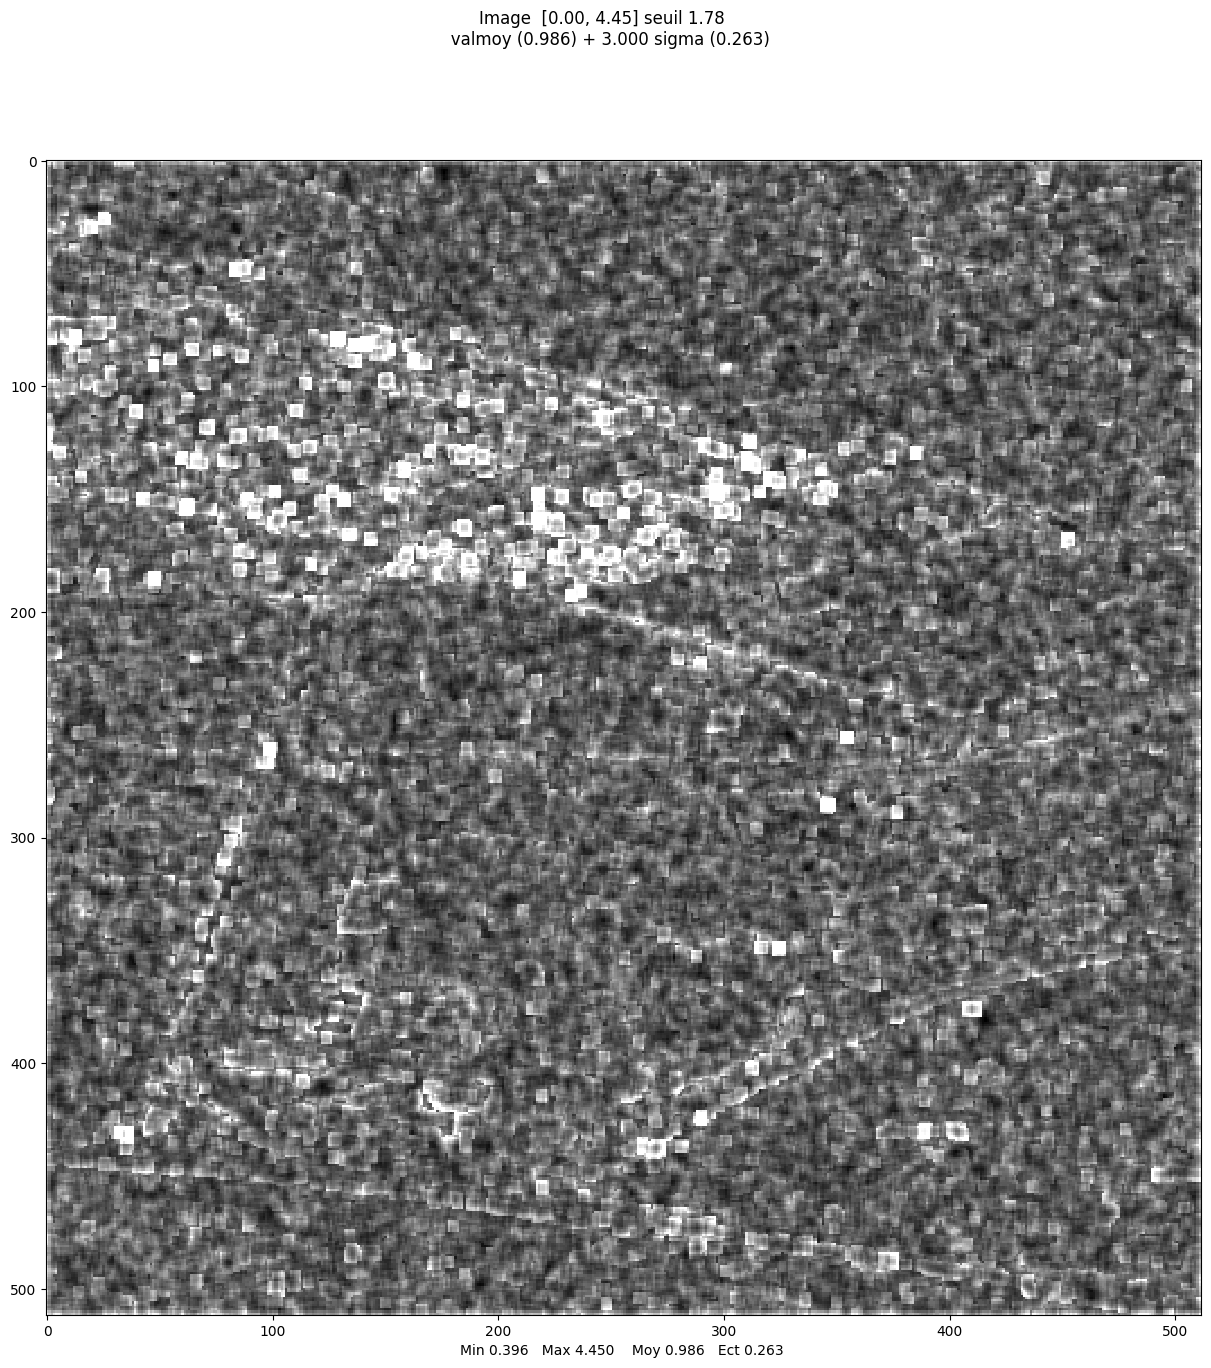

In [28]:
# compute the variance image (var{I} = E{I^2} - E{I}^2)
ima_int_square = ima_int ** 2  # I^2 
ima_int_mean_square = scipy.signal.convolve2d(ima_int_square,masque_loc,'same')  #complete E{I^2}
ima_variance = ima_int_mean_square - ima_int_mean**2 # complete to compute the variance  

# compute coefficient of variation
ima_coeff_var = np.sqrt(ima_variance) / ima_int_mean

# visualize these two images to compare them 
mvalab.visusar(ima_variance)
mvalab.visusar(ima_coeff_var)
plt.show()

### Question C.2
Which information is enhanced in the image of the local standard deviation ? In the image of the local coefficient of variation ? Which one is the more useful ? 

### Answer C.2

L'image de la variance met en valeur les points particulièrement lumineux par rapport à leur entourage, tandis que l'image du coefficient local de variation permettra de repérer les zones moins homogènes de taille supérieure à la fenêtre de moyennage.  
On a donc plus d'information avec la deuxième.

### C.3 Image despeckling with Lee filter

The local coefficient of variation is also used in a very famous filter for SAR images: the Lee filter. 
The principle of the filter is to combine the pixel value $I_s$ (intensity value of pixel $s$) and the local mean $\hat{\mu}_{s}$ depending on the local coefficient of variation $\hat{\gamma}_s$ with the following formula :
$$
  \hat{I}_s= \hat{\mu}_{s}+k_s (I_s-\hat{\mu}_{s})
$$

and
$$
  k_s=1- \frac{\gamma_{Sp}^2}{\hat{\gamma}_s^2}
$$

$\gamma_{Sp}$ is the theoretical value of the coefficient of variation for a pure speckle ($\gamma_{Sp}=\frac{1}{\sqrt{L}}$ for a L-look intensity image). For an SLC image, $L=1$.

Using the previous results, compute the image filtered by the Lee filter. 
Warning $k$ should be between O and 1. 


Affichage d'une image reelle
plt.show dans visusar : image 512 x 512


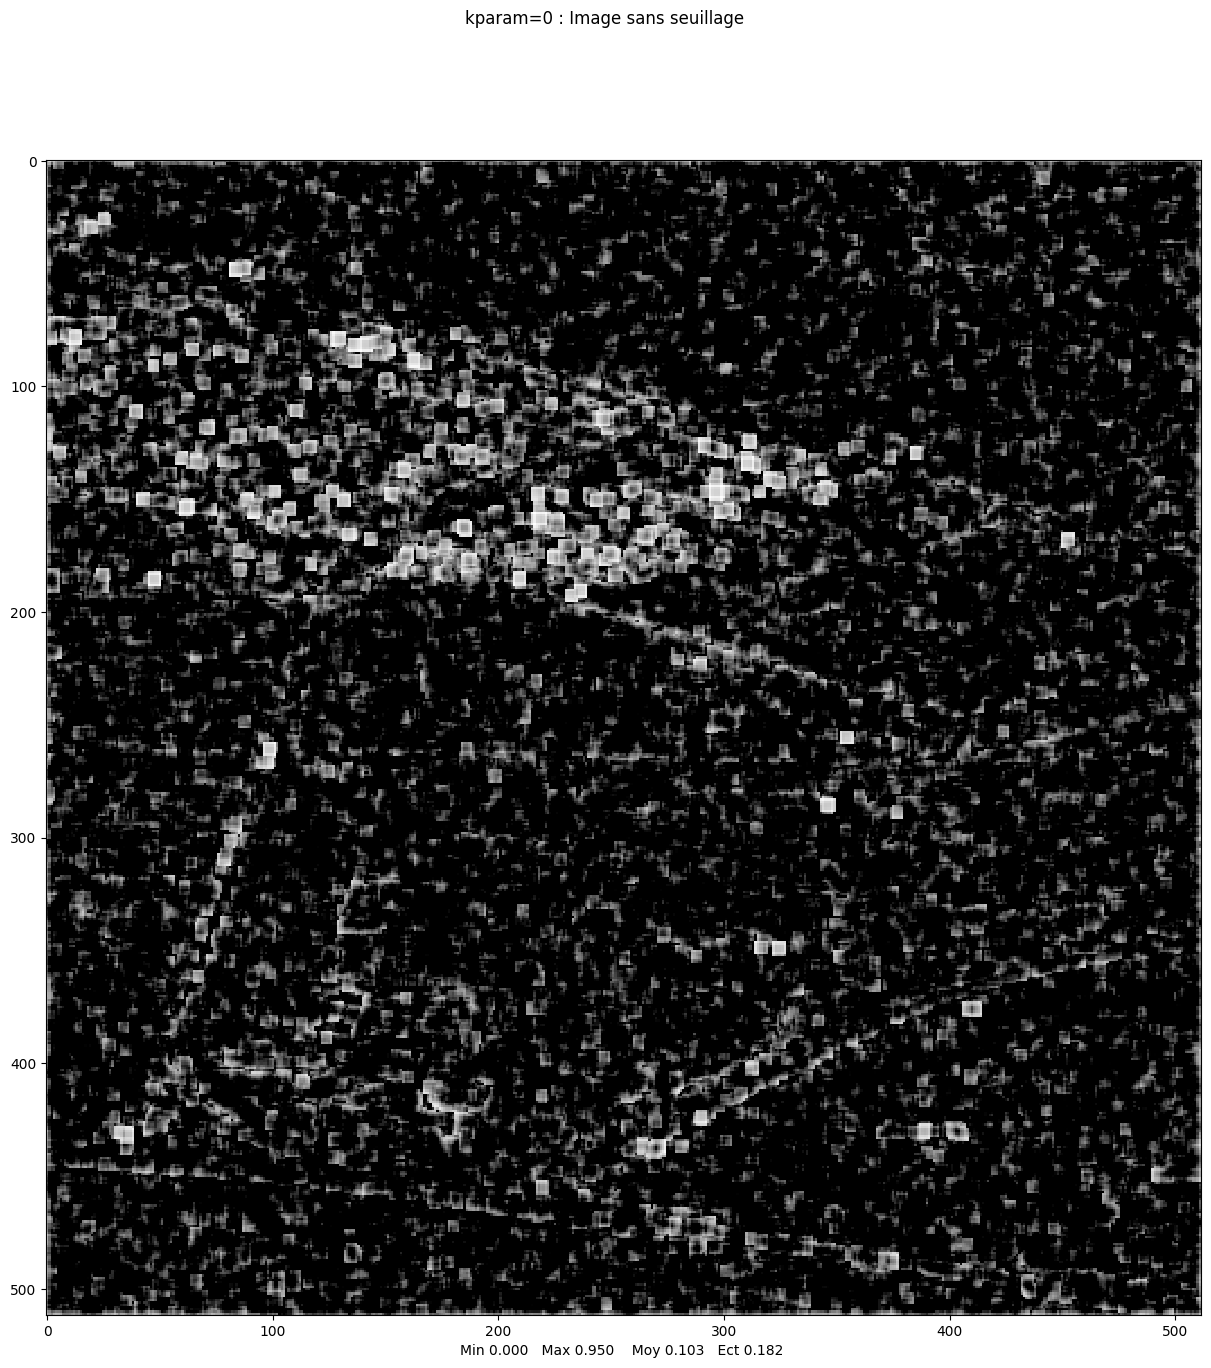

Affichage d'une image reelle
plt.show dans visusar : image 512 x 512


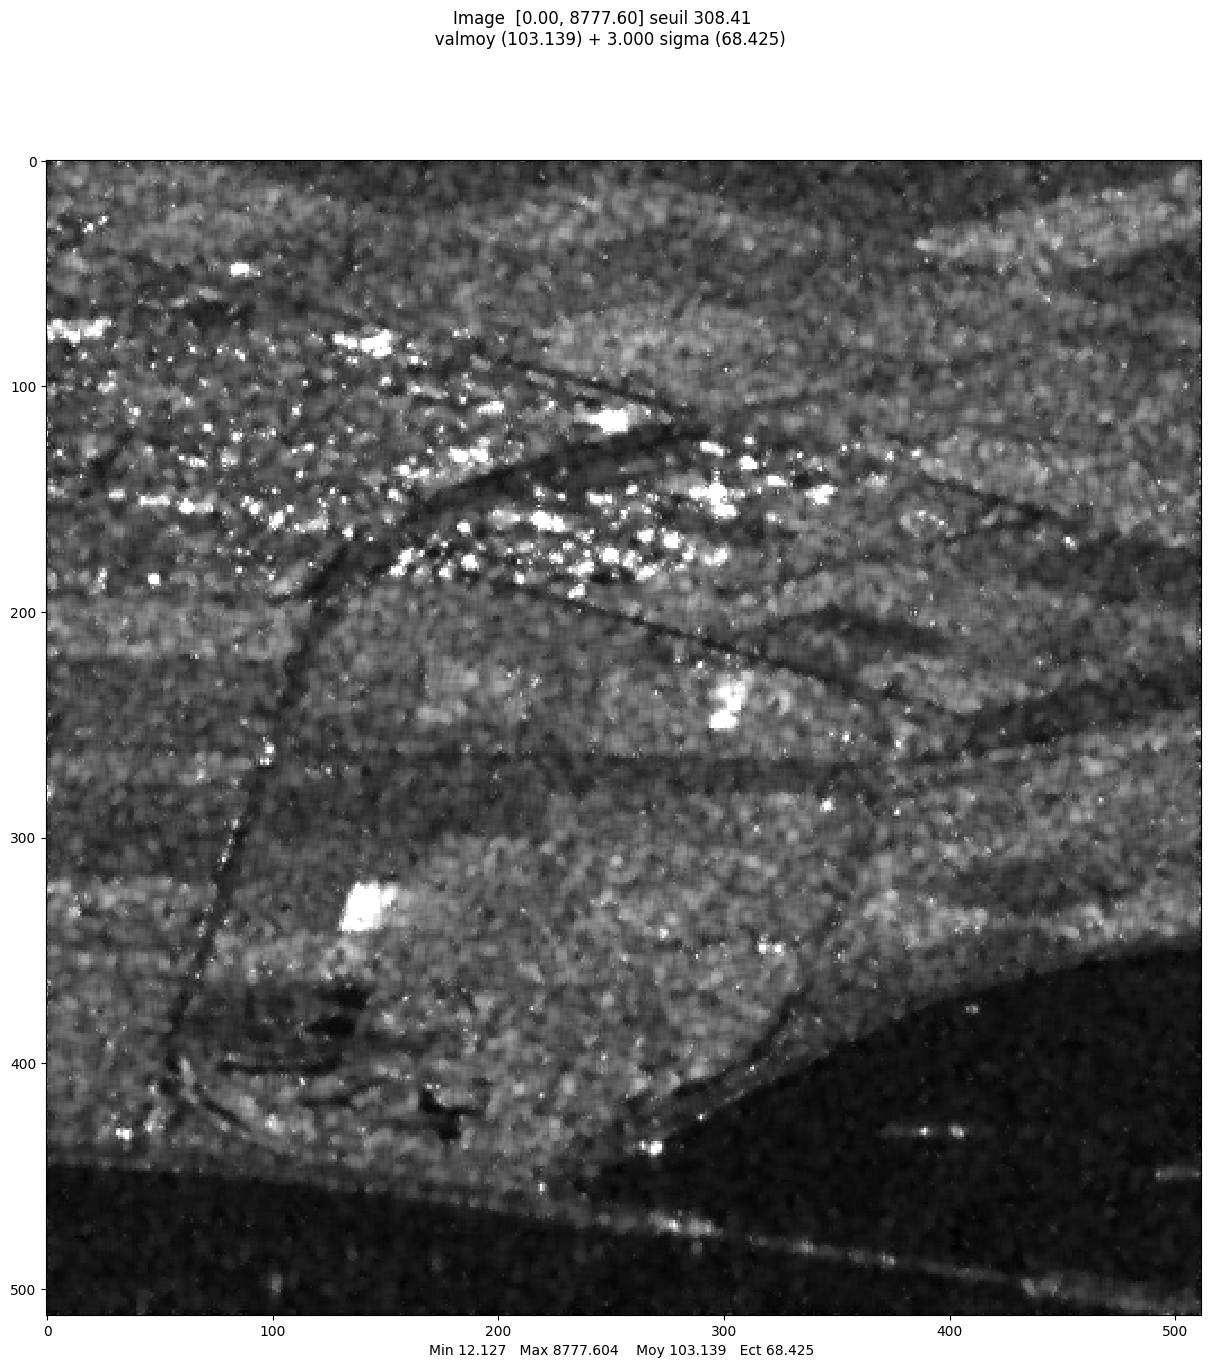

Affichage d'une image reelle
plt.show dans visusar : image 512 x 512


<Figure size 1500x1500 with 0 Axes>

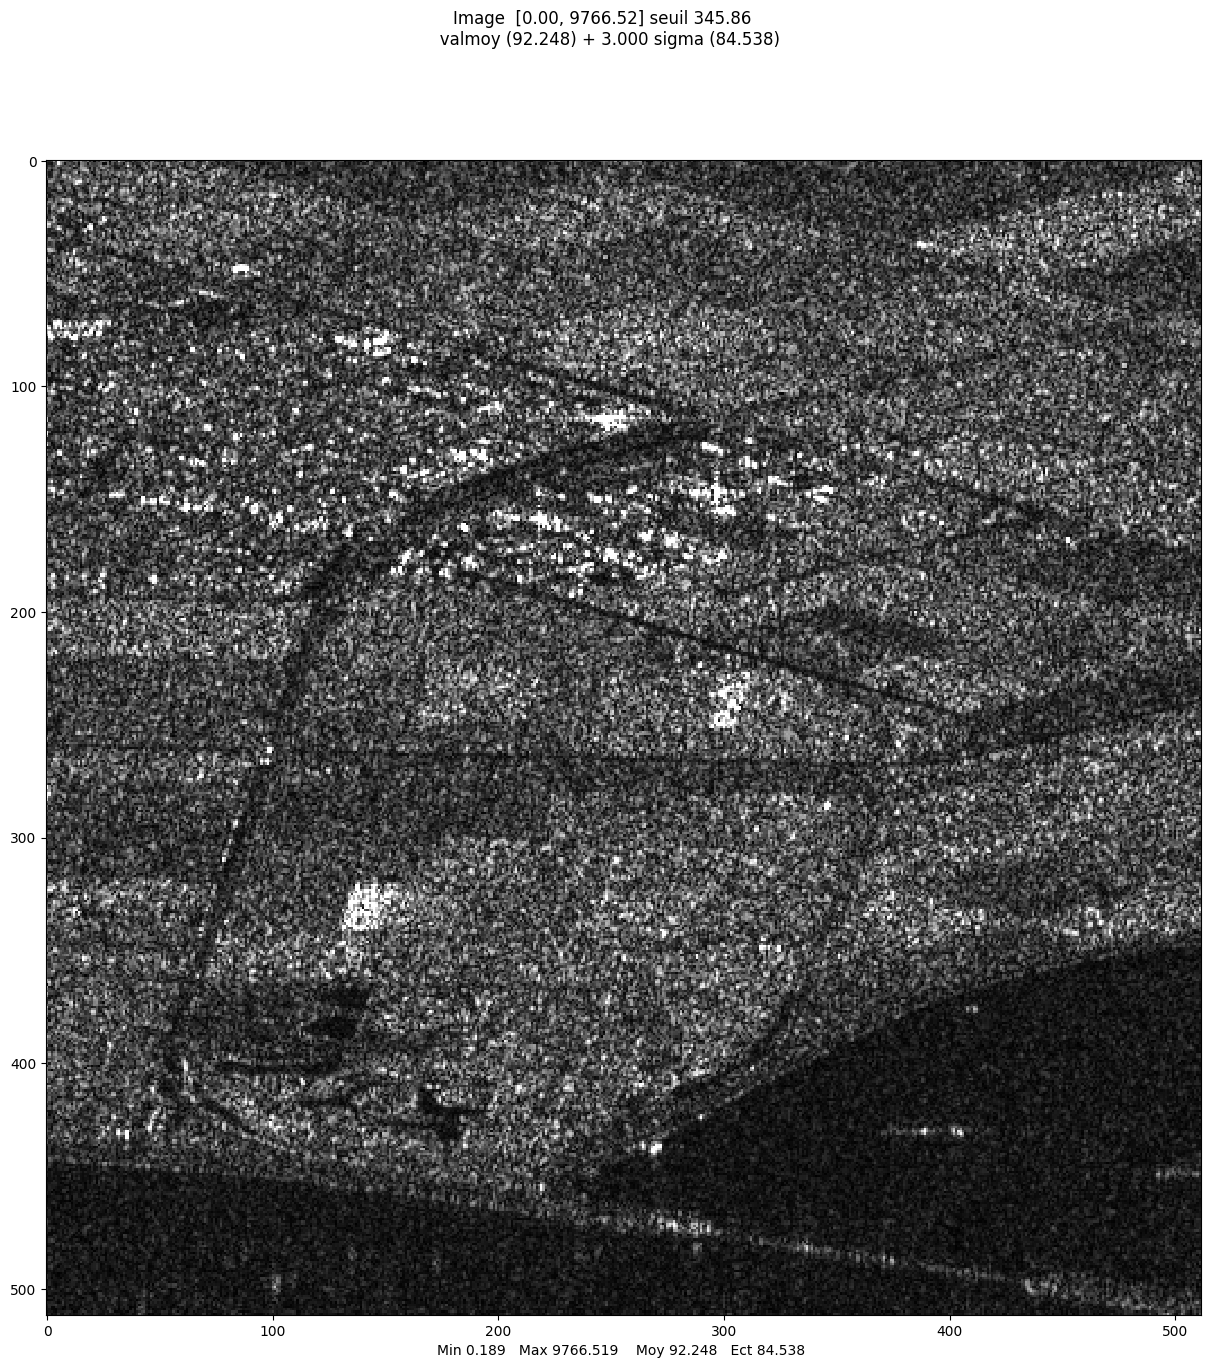

Text(0.5, 0.98, 'Original image')

<Figure size 1500x1500 with 0 Axes>

In [29]:
# compute ks, by taking ima_coeff_var previously computed
ks = 1 - 1/ima_coeff_var**2 #complete

# force k to have values comprised in the range [0,1]
ks= np.clip(ks,0,1)
mvalab.visusar(ks,0)

# filter the image
image_lee_filtered = ima_int_mean + ks*(ima_int - ima_int_mean) #complete
mvalab.visusar(np.sqrt(image_lee_filtered))
plt.suptitle(u'Image denoised using Lee filter')
mvalab.visusar(np.sqrt(ima_int))
plt.suptitle(u'Original image')

### Question C.3

Compare the results of the mean filter and the Lee filter. Study the influence of the size of the window of the filters. 


## Filtering of image "Lely" and comparison with a deep learning algorithm
In this part, we will repeat the process done above to denoise a crop of image "Lely" using the Lee filter. Then, we will compare it with the result of a deep learning algorithm called SAR2SAR (https://arxiv.org/abs/2006.15037).

### C.4 Denoised image: SAR2SAR
The Lee filter presents some limits. More recent approaches to suppress noise rely on sofisticated algorithms. You can plot the image of Lely denoised using a deep learning algorthm called SAR2SAR and compare visually the result with the image filtered using the Lee filter.
  

In [36]:
# apply the Lee filter on the following image :
pageweb=' https://perso.telecom-paristech.fr/tupin/TPSAR/pilelely/multitemp/'
image = 'lely_tuple_multitemp.MAT'
part_lely_slc = mvalab.imz2mat(pageweb+image)
part_lely_int = np.square(np.abs(part_lely_slc[0][:,:,0]))
mvalab.visusar(np.sqrt(part_lely_int))

# using your previous code, filter the image part_lely_int with the Lee filter 
# compute the variance image (var{I} = E{I^2} - E{I}^2)
ima_int_square = part_lely_int ** 2  # I^2 
ima_int_mean_square = scipy.signal.convolve2d(ima_int_square,masque_loc,'same')  #complete E{I^2}
ima_variance = ima_int_mean_square - ima_int_mean**2 # complete to compute the variance  

# compute coefficient of variation
ima_coeff_var = np.sqrt(ima_variance) / ima_int_mean

# visualize these two images to compare them 
mvalab.visusar(ima_variance)
mvalab.visusar(ima_coeff_var)
plt.show()

# compute ks, by taking ima_coeff_var previously computed
ks = 1 - 1/ima_coeff_var**2 #complete

# force k to have values comprised in the range [0,1]
ks= np.clip(ks,0,1)
mvalab.visusar(ks,0)

# filter the image
image_lee_filtered = ima_int_mean + ks*(part_lely_int - ima_int_mean) #complete
mvalab.visusar(np.sqrt(image_lee_filtered))
plt.suptitle(u'Image denoised using Lee filter')
mvalab.visusar(np.sqrt(part_lely_int))
plt.suptitle(u'Original image')

imz2mat : version janvier 2018.  Fichier à ouvrir :  https://perso.telecom-paristech.fr/tupin/TPSAR/pilelely/multitemp/lely_tuple_multitemp.MAT
 https://perso.telecom-paristech.fr/tupin/TPSAR/pilelely/multitemp/lely_tuple_multitemp.MAT: est un fichier non ouvrable
Echec à l'appel de imz2mat


TypeError: 'int' object is not subscriptable

In [37]:
# this image has already been processed by a CNN based filter
!wget https://perso.telecom-paristech.fr/tupin/TPSAR/pilelely/denoised_SAR2SAR/lely_tuple_multitemp_SAR2SAR.IMA
!wget https://perso.telecom-paristech.fr/tupin/TPSAR/pilelely/denoised_SAR2SAR/lely_tuple_multitemp_SAR2SAR.dim
im_lely_multitemp_denoised = mvalab.imz2mat('lely_tuple_multitemp_SAR2SAR.IMA')
im1_d = np.abs(im_lely_multitemp_denoised[0][:,:,0]) #amplitude
mvalab.visusar(im1_d)

'wget' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


imz2mat : version janvier 2018.  Fichier à ouvrir : lely_tuple_multitemp_SAR2SAR.IMA
lely_tuple_multitemp_SAR2SAR.IMA: est un fichier non ouvrable
Echec à l'appel de imz2mat


'wget' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


TypeError: 'int' object is not subscriptable

> Je ne comprends pas ce qui ne fonctionne pas dans l'importation d'images.

### Question C.4  
Do a comparison between the CNN filtering and the Lee filter. Comment the two results. Are homogeneous areas well restored? Do the methods preserve edges and fine structures? Are artifacts introduced?

### Answer C.4

## D. Method noise
Performances of a denoising algorithm can be visually interpreted by looking at the *residual noise* (i.e. the ratio between the noisy image and the denoised image, in intensity). For a quantitative evaluation, we can look at the noise statistics, knowing that, in intensity, statistics of speckle S are:
- $\mu_S=1$
- $\sigma^2_S = \frac{1}{L}$

### Question D
Compute the aforementioned ratio image, mean value and variance for the image restored using the Lee filter and the result of SAR2SAR. Comment the results.

What is the interest of computing the method noise ? What are your conclusions for the two previous filters ?

### Answer D

In [ ]:
# Plot the residual noise
res_noise_lee = ... #complete
mvalab.visusar(res_noise_lee)
mean_lee = np.mean(res_noise_lee)
var_lee = np.var(res_noise_lee)
print('LEE FILTER: mean = '+str(mean_lee)+' and var = '+str(var_lee))

res_noise_deep = ... #complete
mvalab.visusar(res_noise_deep)
mean_deep = np.mean(res_noise_deep)
var_deep = np.var(res_noise_deep)
print('SAR2SAR: mean = '+str(mean_deep)+' and var = '+str(var_deep))